# **Timeseries Analysis**

https://www.kaggle.com/dougcresswell/daily-total-female-births-in-california-1959

In [ ]:
df = pd.read_csv('/content/drive/My Drive/daily-total-female-births-CA.csv')
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
df.shape

(365, 2)

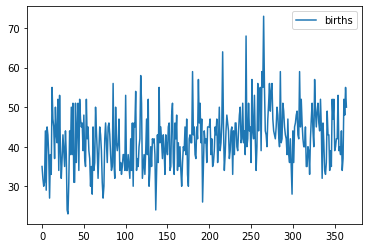

In [ ]:
df.plot()

In [ ]:
df.isnull().sum()

date      0
births    0
dtype: int64

In [ ]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


**Checking for stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('/content/drive/My Drive/daily-total-female-births-CA.csv',names=['value'], header=0)
result = adfuller(df.value, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Critial Values:
   1%, -3.448748905151901
Critial Values:
   5%, -2.8696473721448728
Critial Values:
   10%, -2.5710891239349585


**Degree of differencing(d)**

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(16,12), 'figure.dpi':120})

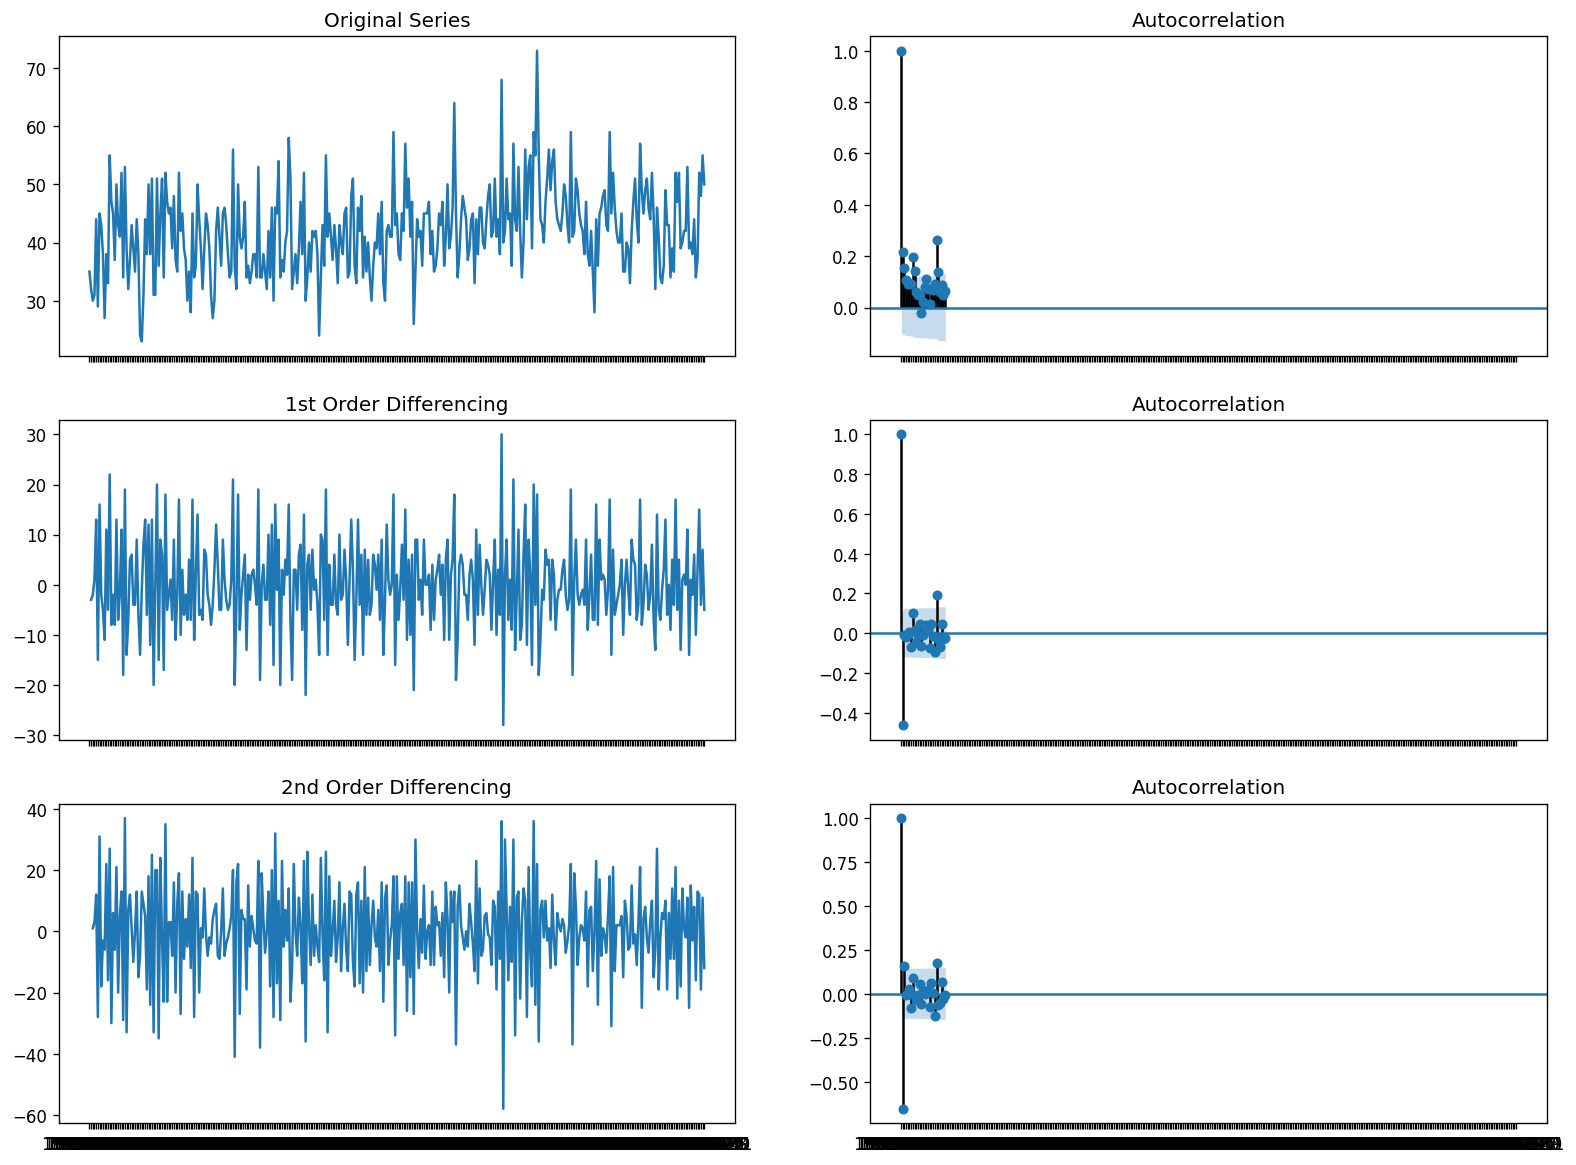

In [ ]:
df = pd.read_csv('/content/drive/My Drive/daily-total-female-births-CA.csv', names=['value'], header=0)
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -12.625179
p-value: 0.000000


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.879539
p-value: 0.000000


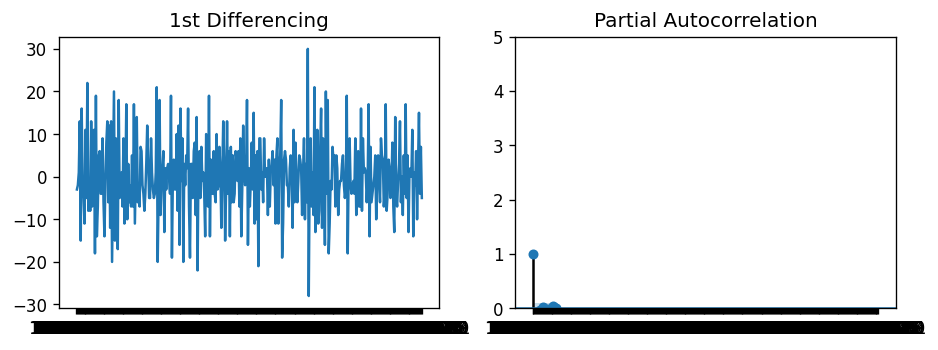

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

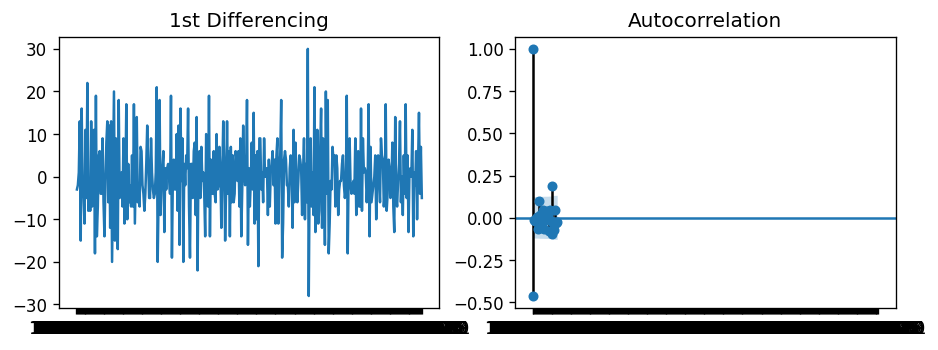

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
df = pd.read_csv('/content/drive/My Drive/daily-total-female-births-CA.csv', names=['value'], header=0)
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

**Arima model**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Wed, 16 Jun 2021   AIC                           2460.154
Time:                        18:09:44   BIC                           2475.742
Sample:                    01-02-1959   HQIC                          2466.350
                         - 12-31-1959                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.value     0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.value    -0.9694      0.019    -

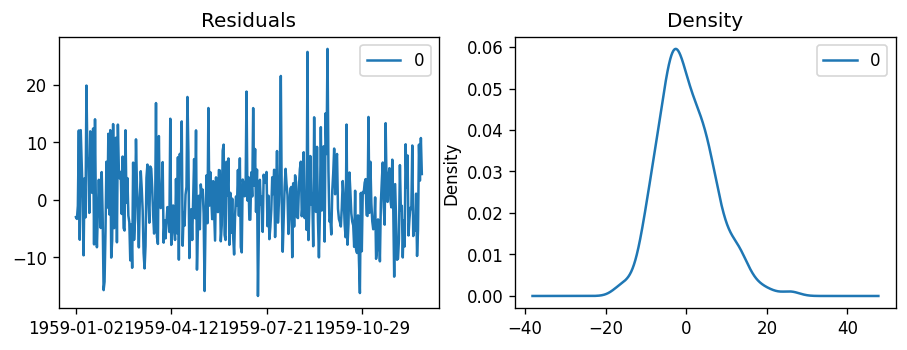

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

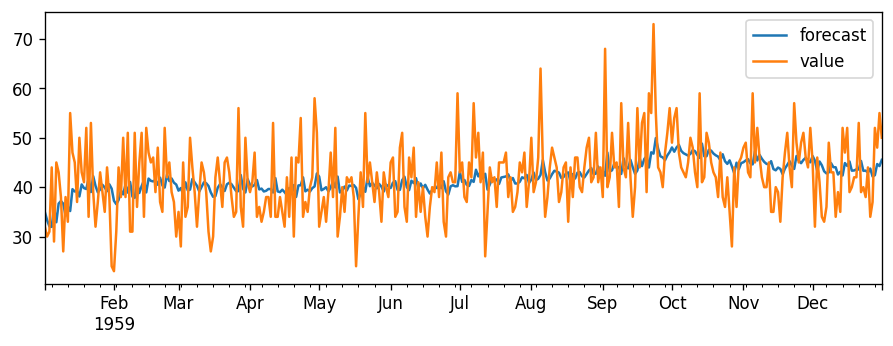

In [ ]:
# Actual vs Fitted data
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Train test split
train = df.value[:306]
test = df.value[306:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  305
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1031.760
Method:                       css-mle   S.D. of innovations              7.092
Date:                Wed, 16 Jun 2021   AIC                           2071.520
Time:                        18:09:45   BIC                           2086.401
Sample:                    01-02-1959   HQIC                          2077.472
                         - 11-02-1959                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0238      0.012      2.036      0.042       0.001       0.047
ar.L1.D.value     0.1138      0.062      1.840      0.066      -0.007       0.235
ma.L1.D.value    -0.9798      0.025    -

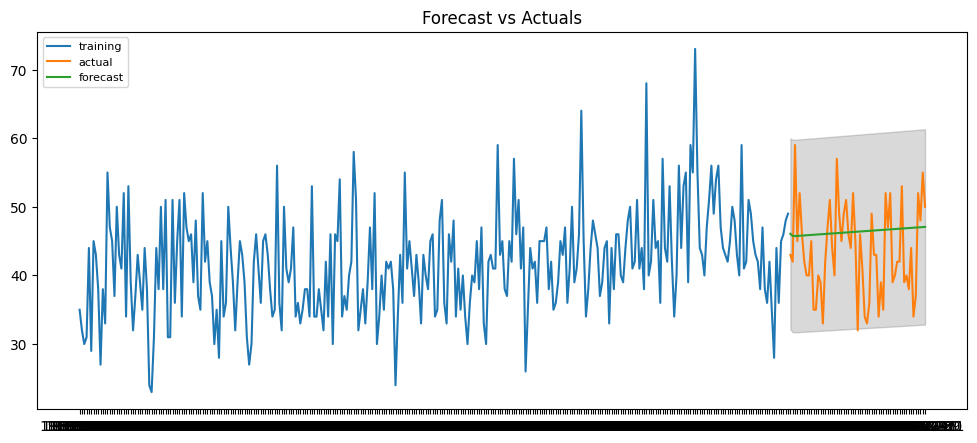

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit() 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(59, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#Accuracy Metrics
import numpy as np

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


{'acf1': 0.2746654787470683,
 'corr': -0.02089357175727467,
 'mae': 5.886460930494536,
 'mape': 0.14664834516443181,
 'me': 2.8765632702452604,
 'minmax': 0.12265441046013648,
 'mpe': 0.09009241990907757,
 'rmse': 7.095658146135325}

In [ ]:
pip install pmdarima

In [ ]:
#Auto Arima Forecast
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/daily-total-female-births-CA.csv', names=['value'], header=0)
model_arima= pm.auto_arima(df.value,trace=True, error_action='ignore', test='adf',start_p=1,start_q=1,max_p=5,max_q=5,d=None,
                   suppress_warnings=True,stepwise=False,seasonal=False)
print(model_arima.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3407.164, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3188.684, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3062.268, Time=0.21 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2966.750, Time=0.39 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2894.551, Time=0.48 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.891, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2471.853, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2472.721, Time=0.47 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2474.635, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2471.358, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/daily-total-female-births-CA.csv', names=['value'], header=0)

model_arima= pm.auto_arima(df.value,trace=True, error_action='ignore', test='adf',start_p=1,start_q=1,max_p=5,max_q=5,d=None,
                   suppress_warnings=True,stepwise=False,seasonal=False)
print(model_arima.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3407.164, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3188.684, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3062.268, Time=0.21 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2966.750, Time=0.41 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2894.551, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.891, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2471.853, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2472.721, Time=0.48 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2474.635, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2471.358, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]  

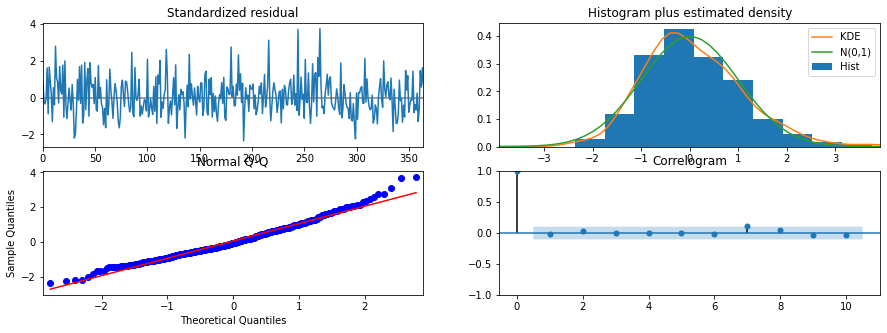

In [ ]:
#residual plots in ARIMA model
import matplotlib.pyplot as plt
%matplotlib inline
model_arima.plot_diagnostics(figsize=(15, 5))
plt.show()

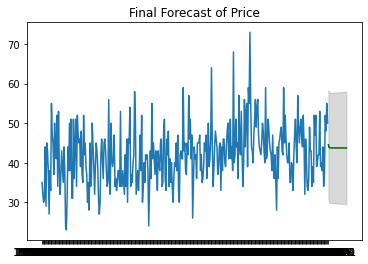

In [ ]:
#final forcast
import numpy as np
n_periods = 24

fc, confint = model_arima.predict(n_periods = n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Price")
plt.show()